# 텐서(Tensor)
- 텐서는 배열 및 행렬과 매우 유사한 특수 데이터 구조
- n-차원 배열
- 텐서는 GPU등과 같은 다른 하드웨어 가속기에서 실행할 수 있다는 점만 제외하면 ndarray와 유사
- PyTorch에서는 텐서를 모델의 가중치뿐만 아니라 입력과 출력으로 하여 학습을 진행
- 딥러닝 모델은 대부분 텐서를 기반으로 작동한다. 이미지, 텍스트, 음성 등 다양한 형태의 데이터를 텐서로 변환하여 모델에 입력하고 학습시킴
- 텐서의 예시
    - 스칼라: 하나의 숫자 값 (0차원 텐서)
    - 벡터: 숫자들의 나열 (1차원 텐서)
    - 행렬: 숫자들의 2차원 배열 (2차원 텐서)
    - 이미지: 픽셀 값들의 3차원 배열 (높이, 너비, 채널)
- 텐서의 주요 속성
    - 랭크(Rank): 텐서의 차원 수를 의미한다. 예를 들어, 3차원 텐서의 랭크는 3이다.
    - 형상(Shape): 각 차원의 크기를 나타내는 튜플이다. 예를 들어, (3, 28, 28) 형상의 텐서는 3개의 28x28 크기 이미지를 나타낸다.
    - 데이터 타입: 텐서에 저장되는 데이터의 종류 (예: float32, int64)

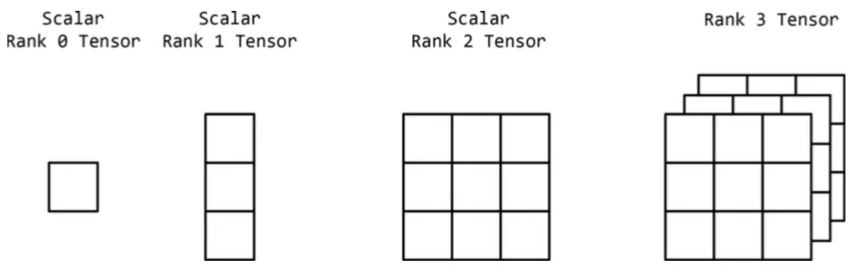

In [ ]:
import numpy as np
import torch

# 텐서 만들기

## 리스트를 텐서로 변환

In [ ]:
data = [
    [1,2,3],
    [4,5,6]
]

In [ ]:
x = torch.tensor(data)
type(x)

torch.Tensor

In [ ]:
x

tensor([[1, 2, 3],
        [4, 5, 6]])

## 텐서의 주요 속성

- 텐서의 차원 수

In [ ]:
x.ndim

2

- shape

In [ ]:
x.shape

torch.Size([2, 3])

- 요소의 데이터타입

In [ ]:
x.dtype

torch.int64

- 텐서의 장치 위치 확인

In [ ]:
x.device

device(type='cpu')

- ndarray 를 텐서로 변환

In [ ]:
data = np.array(data)
torch.tensor(data)

tensor([[1, 2, 3],
        [4, 5, 6]])

## tensor 함수
- 입력 받은 데이터의 데이터 타입을 유지하면서 텐서로 변환
- 주요 파라미터
    - dtype
        - 데이터 타입을 지정
        - 기본값은 None으로 입력 받은 데이터의 타입을 유지
    - device
        - 텐서가 위치할 장치 지정

In [ ]:
data.dtype

dtype('int64')

In [ ]:
torch.tensor(data).dtype

torch.int64

In [ ]:
torch.tensor(data, dtype=torch.int32)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

- 파이토치에서 신경망 모델에 텐서를 전달할 때
    - 정수형은 int64
    - 실수형은 float32

## Tensor 클래스
- 입력받은 데이터를 데이터타입이 float32인 텐서로 변경

In [ ]:
data.dtype

dtype('int64')

In [ ]:
x = torch.Tensor(data)
x.dtype

torch.float32

## from_numpy 함수
- ndarray 를 텐서로 변환
- 원본 데이터와 메모리 공유

In [ ]:
data

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
x = torch.from_numpy(data)
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
x[0,0] = 100
x

tensor([[100,   2,   3],
        [  4,   5,   6]])

In [ ]:
data

array([[100,   2,   3],
       [  4,   5,   6]])

# 텐서를 ndarray 로 변환

In [ ]:
x.numpy()

array([[100,   2,   3],
       [  4,   5,   6]])

In [ ]:
np.array(x)

array([[100,   2,   3],
       [  4,   5,   6]])

# 텐서를 파이썬 자료형으로 변환

In [ ]:
x

tensor([[100,   2,   3],
        [  4,   5,   6]])

- 리스트

In [ ]:
x.tolist()

[[100, 2, 3], [4, 5, 6]]

- 스칼라 텐서를 파이썬 자료형으로 변환

In [ ]:
a = torch.tensor(1004)
a

tensor(1004)

In [ ]:
a.item()

1004

# 인덱싱, 슬라이싱, 마스킹, 멀티 인덱싱

In [ ]:
data = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]
data

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [ ]:
x = torch.Tensor(data)
x

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
x[:, 1:]

tensor([[2., 3.],
        [5., 6.],
        [8., 9.]])

In [ ]:
mask = [True, False, False]
x[mask]

tensor([[1., 2., 3.]])

In [ ]:
idx_lst = [0, 1, 1, 0]
x[idx_lst]

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [4., 5., 6.],
        [1., 2., 3.]])

# 랜덤한 값을 가지는 텐서 생성

- rand 함수
    - 0~1 사이의 랜덤값을 생성

In [ ]:
torch.manual_seed(42) # 시드 고정
torch.rand(5)

tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904])

In [ ]:
torch.rand([5,2,3])

tensor([[[0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346]],

        [[0.5936, 0.8694, 0.5677],
         [0.7411, 0.4294, 0.8854]],

        [[0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969]],

        [[0.8317, 0.1053, 0.2695],
         [0.3588, 0.1994, 0.5472]],

        [[0.0062, 0.9516, 0.0753],
         [0.8860, 0.5832, 0.3376]]])

In [ ]:
x.shape

torch.Size([3, 3])

In [ ]:
torch.rand_like(x) # 입력데이터의 shape 에 맞춰 0~1 사이의 값을 생성

tensor([[0.8090, 0.5779, 0.9040],
        [0.5547, 0.3423, 0.6343],
        [0.3644, 0.7104, 0.9464]])

- randn 함수
    - 평균이 0이고 분산이 1인 정규분포의 랜덤한 값을 생성

In [ ]:
torch.randn(5), torch.randn([2,3])

(tensor([-0.3278,  0.7950,  0.2815,  0.0562,  0.5227]),
 tensor([[-0.2384, -0.0499,  0.5263],
         [-0.0085,  0.7291,  0.1331]]))

In [ ]:
torch.randn_like(x)

tensor([[ 0.8640, -1.0157, -0.8887],
        [ 0.1498, -0.2089, -0.3870],
        [ 0.9912,  0.4679, -0.2049]])

- randint 함수
    - 지정한 범위 내의 정수를 랜덤하게 생성

In [ ]:
torch.randint(1, 11, [3, 4])

tensor([[ 3,  1, 10,  9],
        [ 6,  4,  8,  8],
        [ 6, 10,  2,  6]])

In [ ]:
torch.randint_like(x, 1, 21)

tensor([[ 2., 20.,  2.],
        [ 5., 11., 14.],
        [18., 16., 18.]])

# 지정한 값을 가지는 텐서 생성

In [ ]:
torch.arange(1, 11, 2)

tensor([1, 3, 5, 7, 9])

In [ ]:
torch.ones(10)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
torch.ones([2,3])

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.ones_like(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.zeros([2, 3])

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
torch.zeros_like(x, dtype=torch.int32)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [ ]:
torch.full([3,4], True)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [ ]:
torch.full_like(x, 2)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

# 텐서 장치 이동

- gpu 사용 가능한지 확인

In [ ]:
torch.cuda.is_available()

False

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
x.to(device)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

# 텐서 연산하기

In [ ]:
x

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
torch.mul(x, x) # x * x

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

In [ ]:
torch.sub(x, x) # x - x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
torch.add(x, x) # x + x

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

In [ ]:
torch.div(x, x) # x / x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
x * 2 # 브로드캐스팅 지원

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

In [ ]:
x.shape

torch.Size([3, 3])

In [ ]:
y = torch.Tensor([
    [1,2],
    [3,4],
    [5,6]
])
y.shape

torch.Size([3, 2])

In [ ]:
torch.matmul(x, y).shape # 행렬곱, x @ y

torch.Size([3, 2])

In [ ]:
x1 = torch.randint(1,21,[2,3,4])
x2 = torch.randint(1,21,[2,4,5])

torch.matmul(x1, x2).shape

torch.Size([2, 3, 5])

# 집계
- numpy 와 메서드와 함수명이 거의 동일
- axis 파라미터는 dim 파라미터로 대응

In [ ]:
data = [
    [1,2,3],
    [4,5,6]
]
x = torch.Tensor(data) # float32 데이터타입의 텐서로 변환
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
torch.mean(x)

tensor(3.5000)

In [ ]:
torch.sum(x, dim=1) # axis=1

tensor([ 6., 15.])

In [ ]:
x.min()

tensor(1.)

In [ ]:
torch.std(x)

tensor(1.8708)

# 텐서의 차원 변경

In [ ]:
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

- view 메서드
    - 원소의 순서를 유지하면서 차원을 변경
    - 원본 텐서와 메모리를 공유하기 때문에 반환된 텐서의 데이터를 변경하면 원본 텐서도 변경됨

In [ ]:
x_view = x.view(3,2)
x_view

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [ ]:
x_view[2,1] = 100
x_view

tensor([[  1.,   2.],
        [  3.,   4.],
        [  5., 100.]])

In [ ]:
x

tensor([[  1.,   2.,   3.],
        [  4.,   5., 100.]])

- reshape 메서드
    - view 와 실행 결과는 동일
    - view 와 달리 메모리 공간 상에서 연속적이지 않은 경우에도 변환이 가능
    - 가능하다면 view 처럼 반환하고 메모리 공간상에서 요소들이 인접해 있지 않은 경우는 copy 해서 반환

In [ ]:
x_reshape = x.reshape([6,1])
x_reshape

tensor([[  1.],
        [  2.],
        [  3.],
        [  4.],
        [  5.],
        [100.]])

In [ ]:
x_reshape[0,0] = 100
x_reshape

tensor([[100.],
        [  2.],
        [  3.],
        [  4.],
        [  5.],
        [100.]])

In [ ]:
x

tensor([[100.,   2.,   3.],
        [  4.,   5., 100.]])

In [ ]:
x.shape

torch.Size([2, 3])

- transpose 메서드
    - 차원 맞바꾸기
    - 두 개의 차원일 경우에만 가능

In [ ]:
x.transpose(1,0)

tensor([[100.,   4.],
        [  2.,   5.],
        [  3., 100.]])

- permute 메서드
    - 여러 개 차원 맞바꾸기 가능

In [ ]:
x = torch.arange(24).view(2,3,4)
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
x.permute(1,0,2).shape

torch.Size([3, 2, 4])

In [ ]:
x = torch.arange(1,7)
x.shape

torch.Size([6])

- unsqueeze 메서드
    - 1인 차원을 생성하는 메서드
    - 몇 번째 차원에 1인 차원을 생성할지 지정

In [ ]:
x.unsqueeze(0).shape

torch.Size([1, 6])

In [ ]:
x.view(1,-1)

tensor([[1, 2, 3, 4, 5, 6]])

In [ ]:
x.unsqueeze(1).shape

torch.Size([6, 1])

In [ ]:
x.view(-1,1)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

- squeeze 메서드
    - 1인 차원 삭제
    - 차원을 설정하지 않으면 1인 차원을 모두 제거

In [ ]:
x = torch.rand(1,3,1,20,1)
x.shape

torch.Size([1, 3, 1, 20, 1])

In [ ]:
x.squeeze().shape

torch.Size([3, 20])

In [ ]:
x.squeeze(0,2).shape

torch.Size([3, 20, 1])

# 텐서 합치기

In [ ]:
x1 = torch.ones(2,3)
x2 = torch.zeros(2,3)

In [ ]:
torch.cat([x1,x2],dim=0).shape

torch.Size([4, 3])

In [ ]:
torch.cat([x1,x2],dim=1).shape

torch.Size([2, 6])

# 텐서 복사하기

In [ ]:
x.clone()

tensor([[[[[0.0065],
           [0.0939],
           [0.8729],
           [0.7401],
           [0.9208],
           [0.7619],
           [0.6265],
           [0.4951],
           [0.1197],
           [0.0716],
           [0.0323],
           [0.7047],
           [0.2545],
           [0.3994],
           [0.2122],
           [0.4089],
           [0.1481],
           [0.1733],
           [0.6659],
           [0.3514]]],


         [[[0.8087],
           [0.3396],
           [0.1332],
           [0.4118],
           [0.2576],
           [0.3470],
           [0.0240],
           [0.7797],
           [0.1519],
           [0.7513],
           [0.7269],
           [0.8572],
           [0.1165],
           [0.8596],
           [0.2636],
           [0.6855],
           [0.9696],
           [0.4295],
           [0.4961],
           [0.3849]]],


         [[[0.0825],
           [0.7400],
           [0.0036],
           [0.8104],
           [0.8741],
           [0.9729],
           [0.3821],
     